# TODO:
- Set common scale on axis that could be missleading

# README

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import visualizer as viz

# Load data

In [3]:
file_path = 'Data\struct3.csv'
data = viz.get_data(file_path= file_path)
dbpedia_data = data[0]
wiki_data = data[1]

In [4]:
top_s_path = 'Data/top_subjects.csv'
top_s = pd.read_csv(top_s_path)

top_s_db = top_s[(top_s['File'].str.contains('dbpedia')) & (top_s.Rank <= 3)]
top_s_db['File'] = top_s_db['File'].str.replace('http://example.com/dbpedia_', '')
top_s_db['Name'] = top_s_db['Name'].str.replace('http://dbpedia.org/resource/', '')

top_s_wiki = top_s[(top_s['File'].str.contains('wiki')) & (top_s.Rank <= 3)]
top_s_wiki['File'] = top_s_wiki['File'].str.replace('http://example.com/wiki_', '')
top_s_wiki['Name'] = top_s_wiki['Name'].str.replace('http://www.wikidata.org/entity/', '')

<ipython-input-4-489d3a4ad57a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_s_db['File'] = top_s_db['File'].str.replace('http://example.com/dbpedia_', '')
<ipython-input-4-489d3a4ad57a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_s_db['Name'] = top_s_db['Name'].str.replace('http://dbpedia.org/resource/', '')
<ipython-input-4-489d3a4ad57a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [58]:
top_test_ = top_s_db
index_ = pd.MultiIndex.from_product([top_test_['File'].unique(), ['Name', 'Count']])
test_df = pd.DataFrame(columns= index_, index= [1,2,3])
test_df


3-5       3-5-1        3-6        3-7        3-8        ... 2015-10        \
  Name Count  Name Count Name Count Name Count Name Count  ...    Name Count   
1  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN   NaN  ...     NaN   NaN   
2  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN   NaN  ...     NaN   NaN   
3  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN   NaN  ...     NaN   NaN   

  2016-04       2016-10       2019-08       2019-09        
     Name Count    Name Count    Name Count    Name Count  
1     NaN   NaN     NaN   NaN     NaN   NaN     NaN   NaN  
2     NaN   NaN     NaN   NaN     NaN   NaN     NaN   NaN  
3     NaN   NaN     NaN   NaN     NaN   NaN     NaN   NaN  

[3 rows x 24 columns]

In [50]:
top_test = top_s_db
top_test = top_test.drop(['Version'], axis= 1).set_index(['File', 'Rank'])
top_test

Name  Count
File    Rank                                                          
3-5     1               Jimmy_Robinson_%28recording_engineer%29    177
        2                                    Mercedes-Benz_W126    107
        3                                    Mercedes-Benz_W124    104
3-5-1   1               Jimmy_Robinson_%28recording_engineer%29    178
        2                                    Mercedes-Benz_W126    107
        3                                    Mercedes-Benz_W124    104
3-6     1                                            Stan_Levey    183
        2                                      Acleris_cristana    141
        3                                      Acleris_hastiana    139
3-7     1                                       Couples_Retreat    217
        2                                            Stan_Levey    186
        3                                      Acleris_hastiana    139
3-8     1                               Gal%C3%A1pagos_tortoise    225
        2                                            Stan_Levey    187
        3                                    Mercedes-Benz_W124    148
3-9     1             List_of_Malaysian_football_transfers_2012    828
        2     List_of_Russian_football_transfers_winter_2009...    696
        3     List_of_Russian_football_transfers_winter_2010...    678
2015-04 1        List_of_Iranian_football_transfers_summer_2012    551
        2        List_of_Iranian_football_transfers_summer_2011    521
        3        List_of_Mexican_football_transfers_summer_2014    448
2015-10 1        List_of_Chinese_football_transfers_winter_2015   1799
        2        List_of_Iranian_football_transfers_summer_2013   1707
        3             List_of_Malaysian_football_transfers_2012   1634
2016-04 1        List_of_Chinese_football_transfers_winter_2015   1799
        2        List_of_Iranian_football_transfers_summer_2013   1707
        3     List_of_Japanese_football_transfers_winter_201...   1676
2016-10 1        List_of_Serbian_football_transfers_summer_2016   2025
        2        List_of_Chinese_football_transfers_winter_2015   1801
        3        List_of_Iranian_football_transfers_summer_2013   1711
2019-08 1        List_of_Serbian_football_transfers_summer_2017   2186
        2        List_of_Serbian_football_transfers_summer_2016   2042
        3        List_of_Chinese_football_transfers_winter_2019   2009
2019-09 1        List_of_Serbian_football_transfers_summer_2017   2186
        2        List_of_Serbian_football_transfers_summer_2016   2042
        3        List_of_Chinese_football_transfers_winter_2019   2009

In [38]:
top_s_db

,File,Version,Rank,Name,Count
0,3-5,0,1,Jimmy_Robinson_%28recording_engineer%29,177
1,3-5,0,2,Mercedes-Benz_W126,107
2,3-5,0,3,Mercedes-Benz_W124,104
10,3-5-1,1,1,Jimmy_Robinson_%28recording_engineer%29,178
11,3-5-1,1,2,Mercedes-Benz_W126,107
12,3-5-1,1,3,Mercedes-Benz_W124,104
20,3-6,2,1,Stan_Levey,183
21,3-6,2,2,Acleris_cristana,141
22,3-6,2,3,Acleris_hastiana,139
30,3-7,3,1,Couples_Retreat,217


# Introductory data description

## Top K most common

# Structural measures of evolution

## Growth ratio

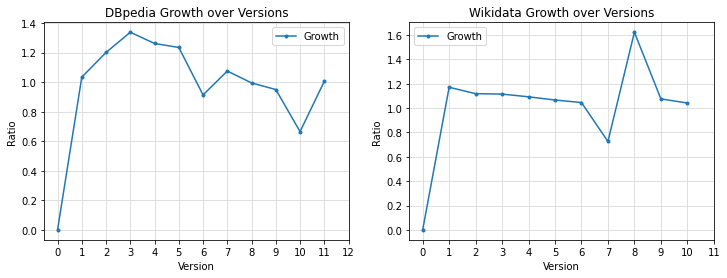

In [ ]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.subplot(1,2,1)
viz.plot_parameters_over_versions(dbpedia_data, ['Growth'], ['.'],"DBpedia Growth over Versions", 'dbpedia_Growth.png', legend_mapping=legend_mapping)
plt.subplot(1,2,2)
viz.plot_parameters_over_versions(wiki_data, ['Growth'], ['.'],"Wikidata Growth over Versions", 'wiki_Growth.png', legend_mapping=legend_mapping)
plt.show()

# Measuring evolution of content

## Knowledge degree

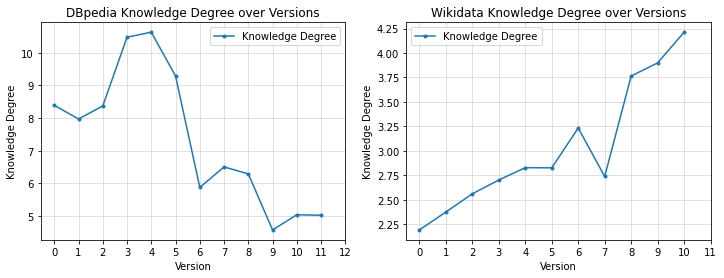

In [ ]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.subplot(1,2,1)
viz.plot_parameters_over_versions(dbpedia_data, ['KD'], ['.'], "DBpedia Knowledge Degree over Versions", 'dbpedia_KD.png', legend_mapping=legend_mapping, x_label='Knowledge Degree')
plt.subplot(1,2,2)
viz.plot_parameters_over_versions(wiki_data, ['KD'], ['.'], "Wikidata Knowledge Degree over Versions", 'wiki_KD.png', legend_mapping=legend_mapping, x_label='Knowledge Degree')
plt.show()

## Change ratio

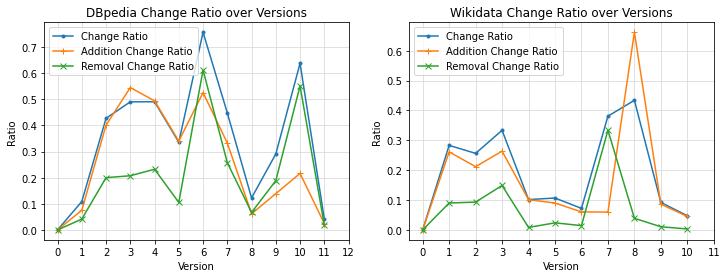

In [ ]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.subplot(1,2,1)
viz.plot_parameters_over_versions(dbpedia_data, ['ChangeRatio', 'AddCR', 'RemCR'], ['.', '+', 'x'], "DBpedia Change Ratio over Versions", 'dbpedia_ChangeRatio.png', legend_mapping=legend_mapping)
plt.subplot(1,2,2)
viz.plot_parameters_over_versions(wiki_data, ['ChangeRatio', 'AddCR', 'RemCR'], ['.', '+', 'x'],"Wikidata Change Ratio over Versions", 'wiki_ChangeRatio.png', legend_mapping=legend_mapping)
plt.show()

## Vocabulary

### Vocabulary uniqueness

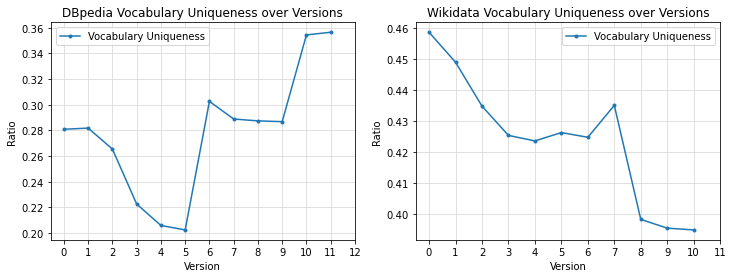

In [ ]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.subplot(1,2,1)
viz.plot_parameters_over_versions(dbpedia_data, ['VocUni'], ['.'], "DBpedia Vocabulary Uniqueness over Versions", 'dbpedia_VocUni.png', legend_mapping=legend_mapping)
plt.subplot(1,2,2)
viz.plot_parameters_over_versions(wiki_data, ['VocUni'], ['.'], "Wikidata Vocabulary Uniqueness over Versions", 'wiki_VocUni.png')
plt.show()

### Vocabulary dynamicity

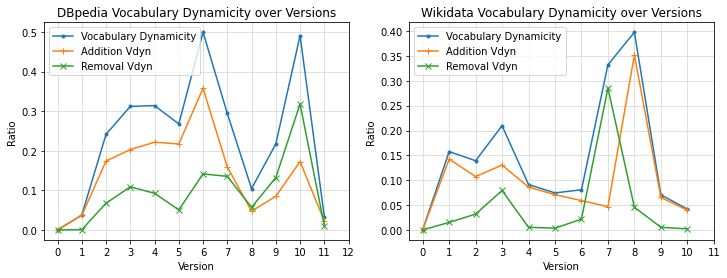

In [ ]:
plt.rcParams["figure.figsize"] = [12, 4]
plt.subplot(1,2,1)
viz.plot_parameters_over_versions(dbpedia_data, ['Vdyn', 'AddVdyn', 'RemVdyn'], ['.', '+', 'x'], "DBpedia Vocabulary Dynamicity over Versions", 'dbpedia_Vdyn.png', legend_mapping=legend_mapping)
plt.subplot(1,2,2)
viz.plot_parameters_over_versions(wiki_data, ['Vdyn', 'AddVdyn', 'RemVdyn'], ['.', '+', 'x'],"Wikidata Vocabulary Dynamicity over Versions", 'wiki_Vdyn.png', legend_mapping=legend_mapping)
plt.show()

# Measuring quality between versions
- Instantiated class ratio
- Instantiated property ratio
- Inverse multiple inheritance number

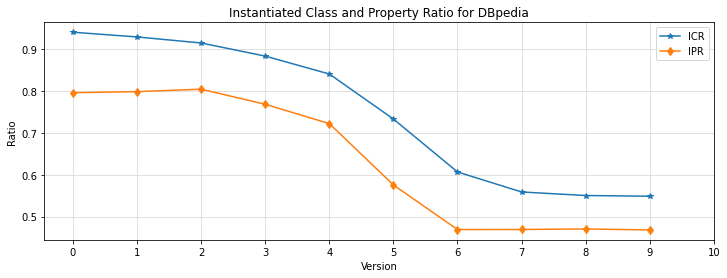

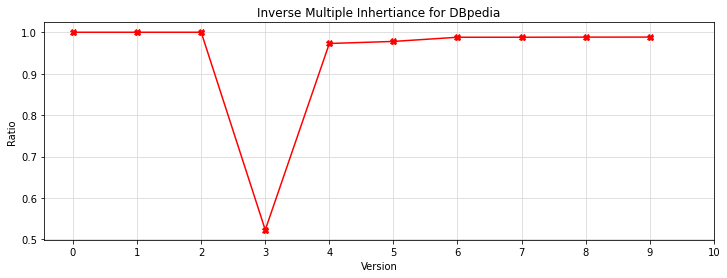

In [ ]:
viz.quality_plots(file_path= 'Data/quality.csv')

## Class growth for DBpedia

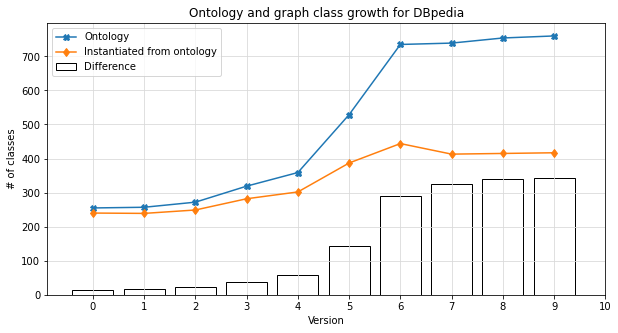

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
viz.ont_growth(file_path= 'Data/icr_set.csv', title_name= 'class')

## Property growth for DBpedia

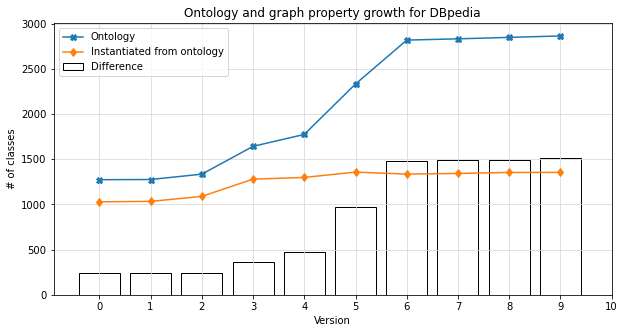

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
viz.ont_growth(file_path= 'Data/ipr_set.csv', title_name= 'property')

## Use of external vs. internal classes

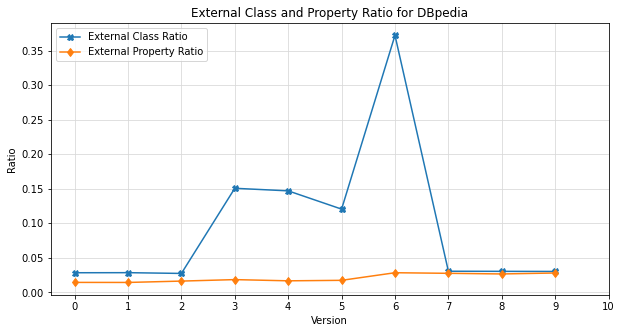

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
viz.external_ratio(class_path= 'Data/icr_set.csv', property_path= 'Data/ipr_set.csv')